# Question 1:

In [2]:
import pandas as pd
# reading csv files
data =  pd.read_csv('E:/Data-Engineering-Jacbos/Semester 2/Statistical Modeling/Project/SeoulBikeData.csv',encoding= 'unicode_escape')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<br><br> 
# Question 2:

## Plotting the histogram and pmf 
## & Calculating mean, standard deviation, skewness and kurtosis

### 1. Temperature

Mean = 12.883
Standard deviation = 11.944
Kurtosis = -0.838
Skewness = -0.198


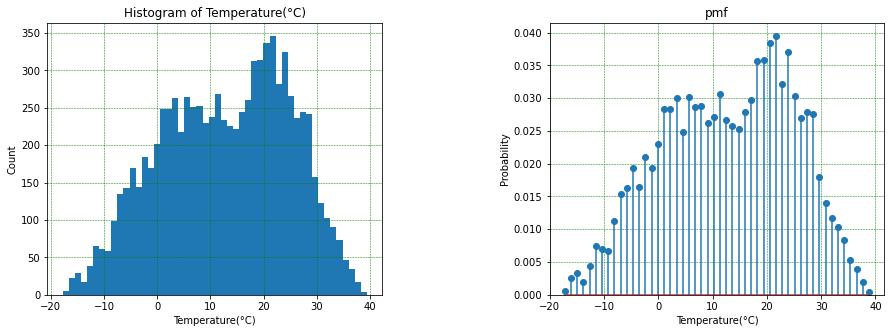

In [14]:
from matplotlib import pyplot as plt
import numpy as np

num_bins = 50
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.hist(data ["Temperature(°C)"],bins=num_bins)
  
ax1.set_title('Histogram of Temperature(°C)')
ax1.set_xlabel('Temperature(°C)')
ax1.set_ylabel('Count')
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5)

counts , bins = np.histogram(data ["Temperature(°C)"],bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
#print (probs.sum()) # 1.0
ax2.stem(bins, probs)
ax2.set_title('pmf')
ax2.set_xlabel('Temperature(°C)')
ax2.set_ylabel('Probability')
ax2.set_ylim(bottom=0)
ax2.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplots_adjust(wspace=0.5)

from scipy.stats import kurtosis
from scipy.stats import skew

kur = kurtosis(data['Temperature(°C)'])
skew = skew(data['Temperature(°C)'])
std = np.std(data['Temperature(°C)'])
mean = np.mean(data['Temperature(°C)'])

print ('Mean =',round(mean,3))
print ('Standard deviation =',round(std,3))
print ('Kurtosis =', round(kur,3))
print ('Skewness =',round(skew,3))

<br><br>
### 2. Wind Speed

Mean = 1.725
Standard deviation = 1.036
Kurtosis = 0.726
Skewness = 0.891


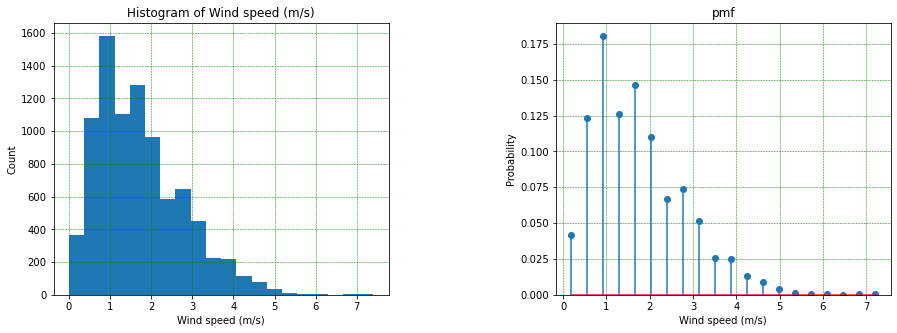

In [8]:
from matplotlib import pyplot as plt
import numpy as np

num_bins = 20
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.hist(data ["Wind speed (m/s)"],bins=num_bins)
  
ax1.set_title('Histogram of Wind speed (m/s)')
ax1.set_xlabel('Wind speed (m/s)')
ax1.set_ylabel('Count')
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5)

counts , bins = np.histogram(data ["Wind speed (m/s)"],bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
#print (probs.sum()) # 1.0
ax2.stem(bins, probs)
ax2.set_title('pmf')
ax2.set_xlabel('Wind speed (m/s)')
ax2.set_ylabel('Probability')
ax2.set_ylim(bottom=0)
ax2.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.subplots_adjust(wspace=0.5)

from scipy.stats import kurtosis
from scipy.stats import skew

kur = kurtosis(data['Wind speed (m/s)'])
skew = skew(data['Wind speed (m/s)'])
std = np.std(data['Wind speed (m/s)'])
mean = np.mean(data['Wind speed (m/s)'])

print ('Mean =',round(mean,3))
print ('Standard deviation =',round(std,3))
print ('Kurtosis =', round(kur,3))
print ('Skewness =',round(skew,3))

<br><br><br><br><br><br><br><br><br><br>
## Finding similar distribution function

### 1. Temperature

,sumsquare_error,aic,bic,kl_div
norm,0.003099,877.975595,-130108.858862,0.046619
lognorm,0.003196,881.856479,-129830.028750,0.048035
gamma,0.003235,880.536255,-129724.134896,0.048740
chi2,0.003407,881.244654,-129270.380649,0.051310
cauchy,0.007611,918.727547,-122237.002613,0.125572


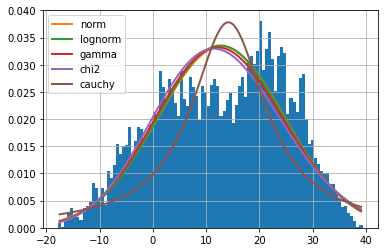

In [15]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data['Temperature(°C)'],
           distributions= get_common_distributions(),
          timeout=60)
f.fit()
f.summary()

From the result, we can see that the normal distribution function is the closest function to the temperature data based on minimum sum squared error. <br>Now, let's calculate the fitted function parameters:

In [35]:
print ('Normal distribution function parameters:', f.fitted_param['norm'])

Normal distribution function parameters: (1.7249086757990868, 1.0362408421713993)


Now, let's check the properties of the model normal distribution function:

In [31]:
import math
from scipy.stats import norm
mean, var, skew, kurt = norm.stats(f.fitted_param['norm'][0],f.fitted_param['norm'][1],moments='mvsk')
print('Mean =',mean)
print('Standard deviation =', math.sqrt(var))
print('Skewness =', skew)
print ('Kurtosis =', kurt)

Mean = 12.882922374429223
Standard deviation = 11.94414342830759
Skewness = 0.0
Kurtosis = 0.0


<br><br><br><br><br><br><br><br>
### 2. Wind Speed

,sumsquare_error,aic,bic,kl_div
gamma,1.460935,671.954482,-76174.905972,inf
lognorm,1.467644,651.469159,-76134.771934,inf
rayleigh,1.539324,801.391173,-75726.128070,inf
exponpow,1.685653,963.966348,-74921.559551,inf
norm,1.784137,983.127172,-74433.228334,inf


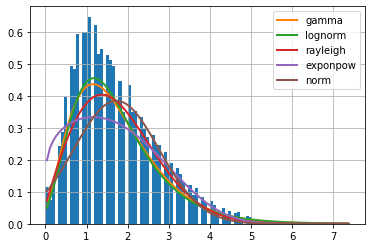

In [21]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data['Wind speed (m/s)'],
           distributions= get_common_distributions(),
          timeout=60)
f.fit()
f.summary()

From the result, we can see that the gamma distribution function is the closest function to the wind speed data based on minimum sum squared error. <br>Now, let's calculate the fitted function parameters:

In [33]:
print ('Gamma function parameters :', f.fitted_param['gamma'])

Gamma function parameters : (3.3976821182115575, -0.21004385628604139, 0.5694913293182653)


Now, let's check the properties of the model gamma function:

In [34]:
from scipy.stats import gamma

mean, var, skew, kurt = gamma.stats(f.fitted_param['gamma'][0],f.fitted_param['gamma'][1],f.fitted_param['gamma'][2]
                                    , moments='mvsk')
print('Mean =',mean)
print('Standard deviation =', math.sqrt(var))
print('Skewness =', skew)
print ('Kurtosis =', kurt)

Mean = 1.724906649815158
Standard deviation = 1.0497321257752485
Skewness = 1.0850221982063935
Kurtosis = 1.7659097559009518
